In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('C:\\Users\\Casper\\Desktop\\dataSet.csv')
# show a samples from the dataset to explain the features
df.head(10)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
5,877557,40-64,female,majority,20-29y,high school,upper class,0.619127,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3,0,3,0.0
6,930134,65+,male,majority,30y+,high school,upper class,0.492944,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7,0,3,0.0
7,461006,26-39,female,majority,0-9y,university,working class,0.468689,0.0,after 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,1.0
8,68366,40-64,female,majority,20-29y,university,working class,0.521815,0.0,before 2015,1.0,0.0,10238,13000.0,sedan,0,0,0,0.0
9,445911,40-64,female,majority,0-9y,high school,upper class,0.561531,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,1.0


In [8]:

# this is simple description for the dataset
print("The dataset contains " + str(df.shape[0]) + " rows.")
print("The dataset contains " + str(df.shape[1]) + " columns(features).")
print('--------------------------------------------------------')
print("Here is some information features of the dataset.")
df.info()

The dataset contains 10000 rows.
The dataset contains 19 columns(features).
--------------------------------------------------------
Here is some information features of the dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POST

In [9]:

print('--------------------------------------------------------')
print("Non-numeric features")
print(df.select_dtypes(exclude='number').columns)
print('--------------------------------------------------------')
print("Numeric features")
print(df.select_dtypes(include='number').columns)
df.shape

--------------------------------------------------------
Non-numeric features
Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')
--------------------------------------------------------
Numeric features
Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')


(10000, 19)

In [10]:
print(df.columns)

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')


In [11]:
df.drop(columns=["ID"], inplace=True, errors='ignore')

In [12]:
print(df.shape)
df.describe().T

(10000, 18)


,count,mean,std,min,25%,50%,75%,max
CREDIT_SCORE,9018.0,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
VEHICLE_OWNERSHIP,10000.0,0.697000,0.459578,0.000000,0.000000,1.000000,1.000000,1.000000
MARRIED,10000.0,0.498200,0.500022,0.000000,0.000000,0.000000,1.000000,1.000000
CHILDREN,10000.0,0.688800,0.463008,0.000000,0.000000,1.000000,1.000000,1.000000
POSTAL_CODE,10000.0,19864.548400,18915.613855,10238.000000,10238.000000,10238.000000,32765.000000,92101.000000
ANNUAL_MILEAGE,9043.0,11697.003207,2818.434528,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
SPEEDING_VIOLATIONS,10000.0,1.482900,2.241966,0.000000,0.000000,0.000000,2.000000,22.000000
DUIS,10000.0,0.239200,0.554990,0.000000,0.000000,0.000000,0.000000,6.000000
PAST_ACCIDENTS,10000.0,1.056300,1.652454,0.000000,0.000000,0.000000,2.000000,15.000000
OUTCOME,10000.0,0.313300,0.463858,0.000000,0.000000,0.000000,1.000000,1.000000


VEHICLE_OWNERSHIP         2
MARRIED                   2
CHILDREN                  2
OUTCOME                   2
POSTAL_CODE               4
DUIS                      7
PAST_ACCIDENTS           15
ANNUAL_MILEAGE           21
SPEEDING_VIOLATIONS      21
CREDIT_SCORE           9018
dtype: int64


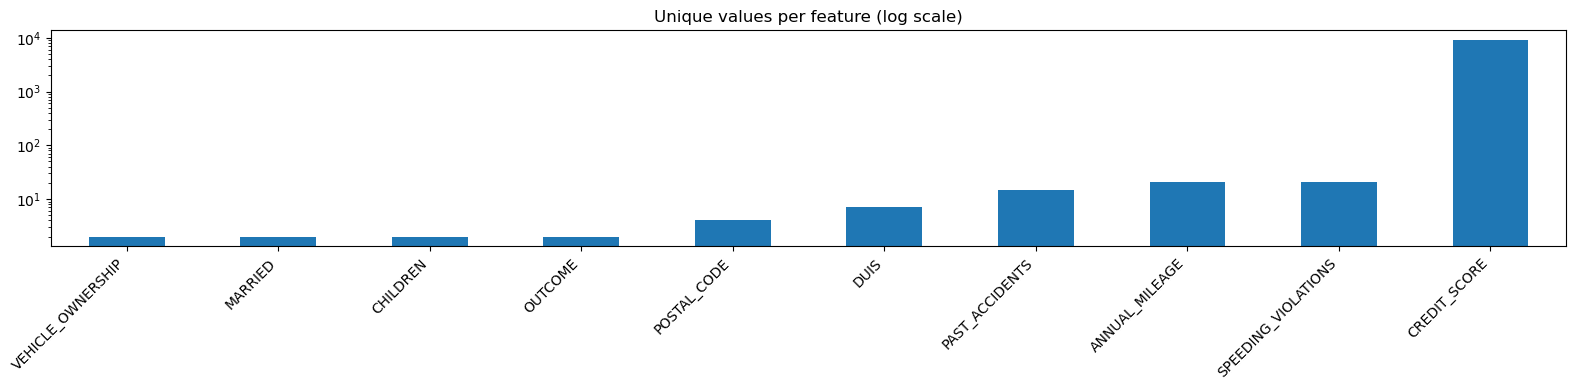

In [13]:
# For each numerical feature # number of unique entries
# unique values
uniqueVal = df.select_dtypes(include="number").nunique().sort_values()
print(uniqueVal)
# Plot information uniqueVal
uniqueVal.plot.bar(figsize=(11, 3), title="Unique values per feature")
ax = uniqueVal.plot.bar(figsize=(16, 4), title="Unique values per feature (log scale)", logy=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
# check if we have a duplicate rows - samples
duplicates_values = df.duplicated().sum()
duplicates_values

12

C:\Users\Casper\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


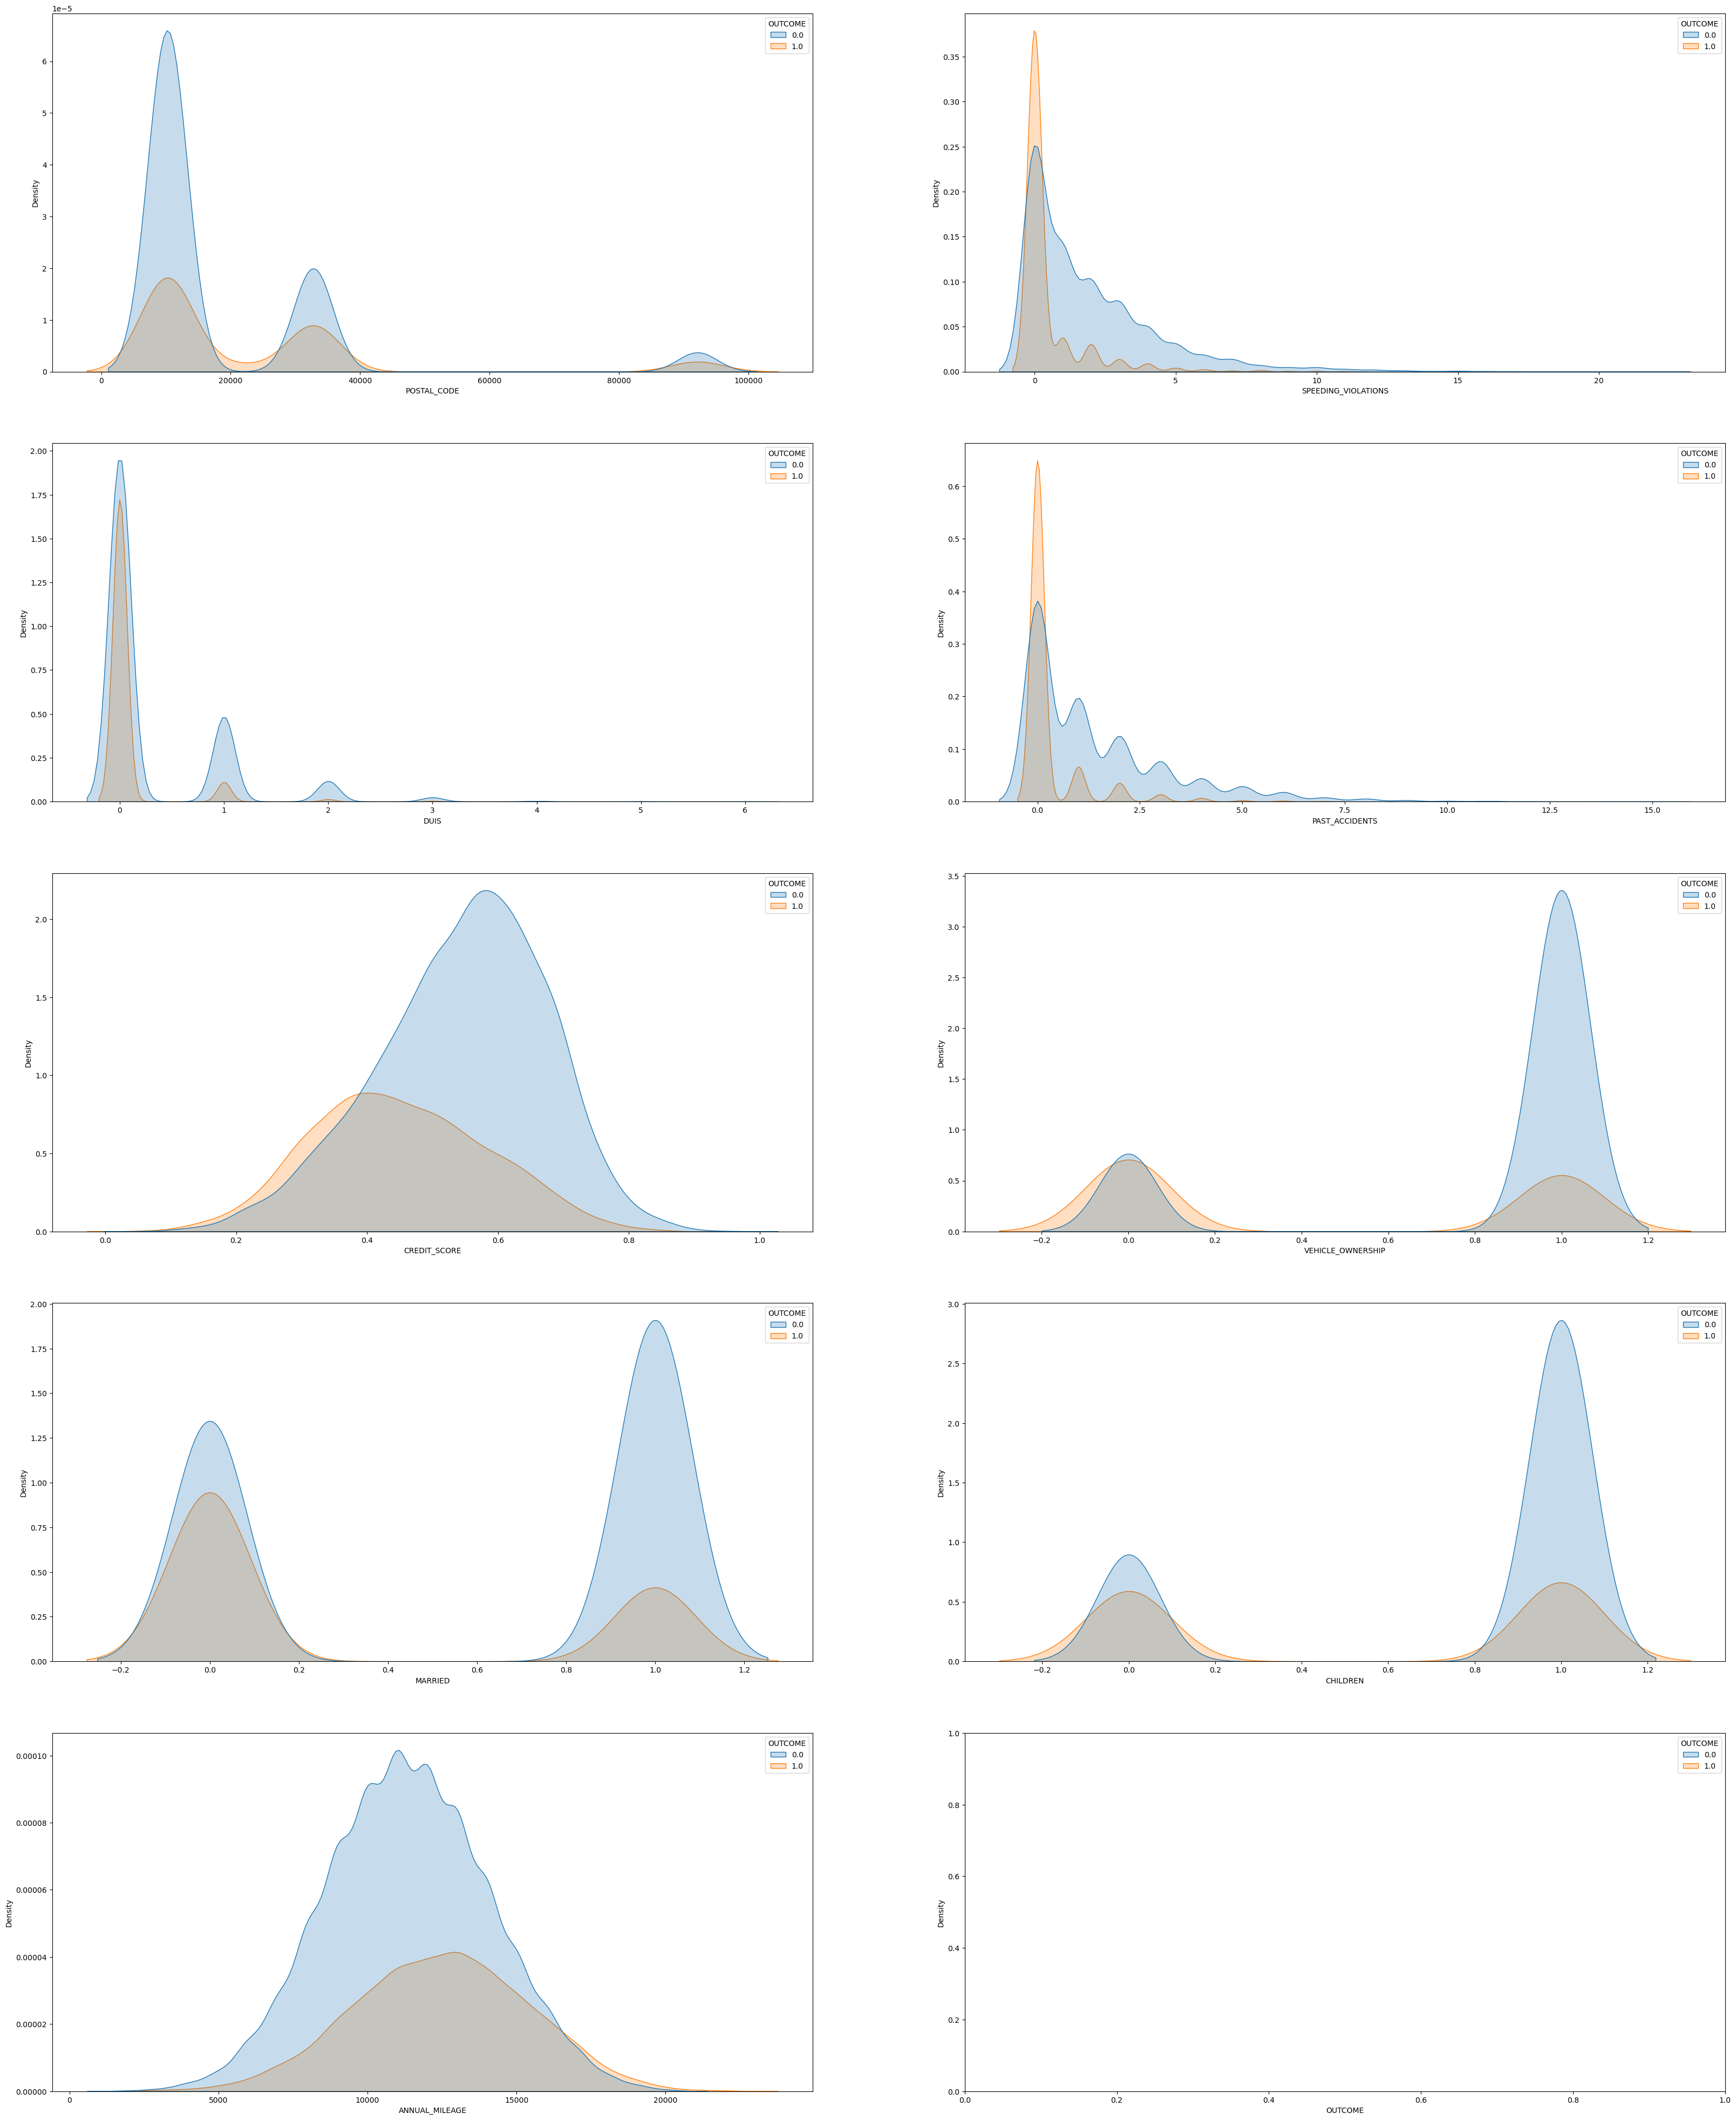

In [15]:
fig, axis = plt.subplots(5, 2, figsize = (40, 50))

for col, ax in zip(df.select_dtypes("int64").columns.append(df.select_dtypes("float64").columns), axis.flat[:]):
    sns.kdeplot(data = df, x = col, ax = ax, hue = "OUTCOME", fill = True)


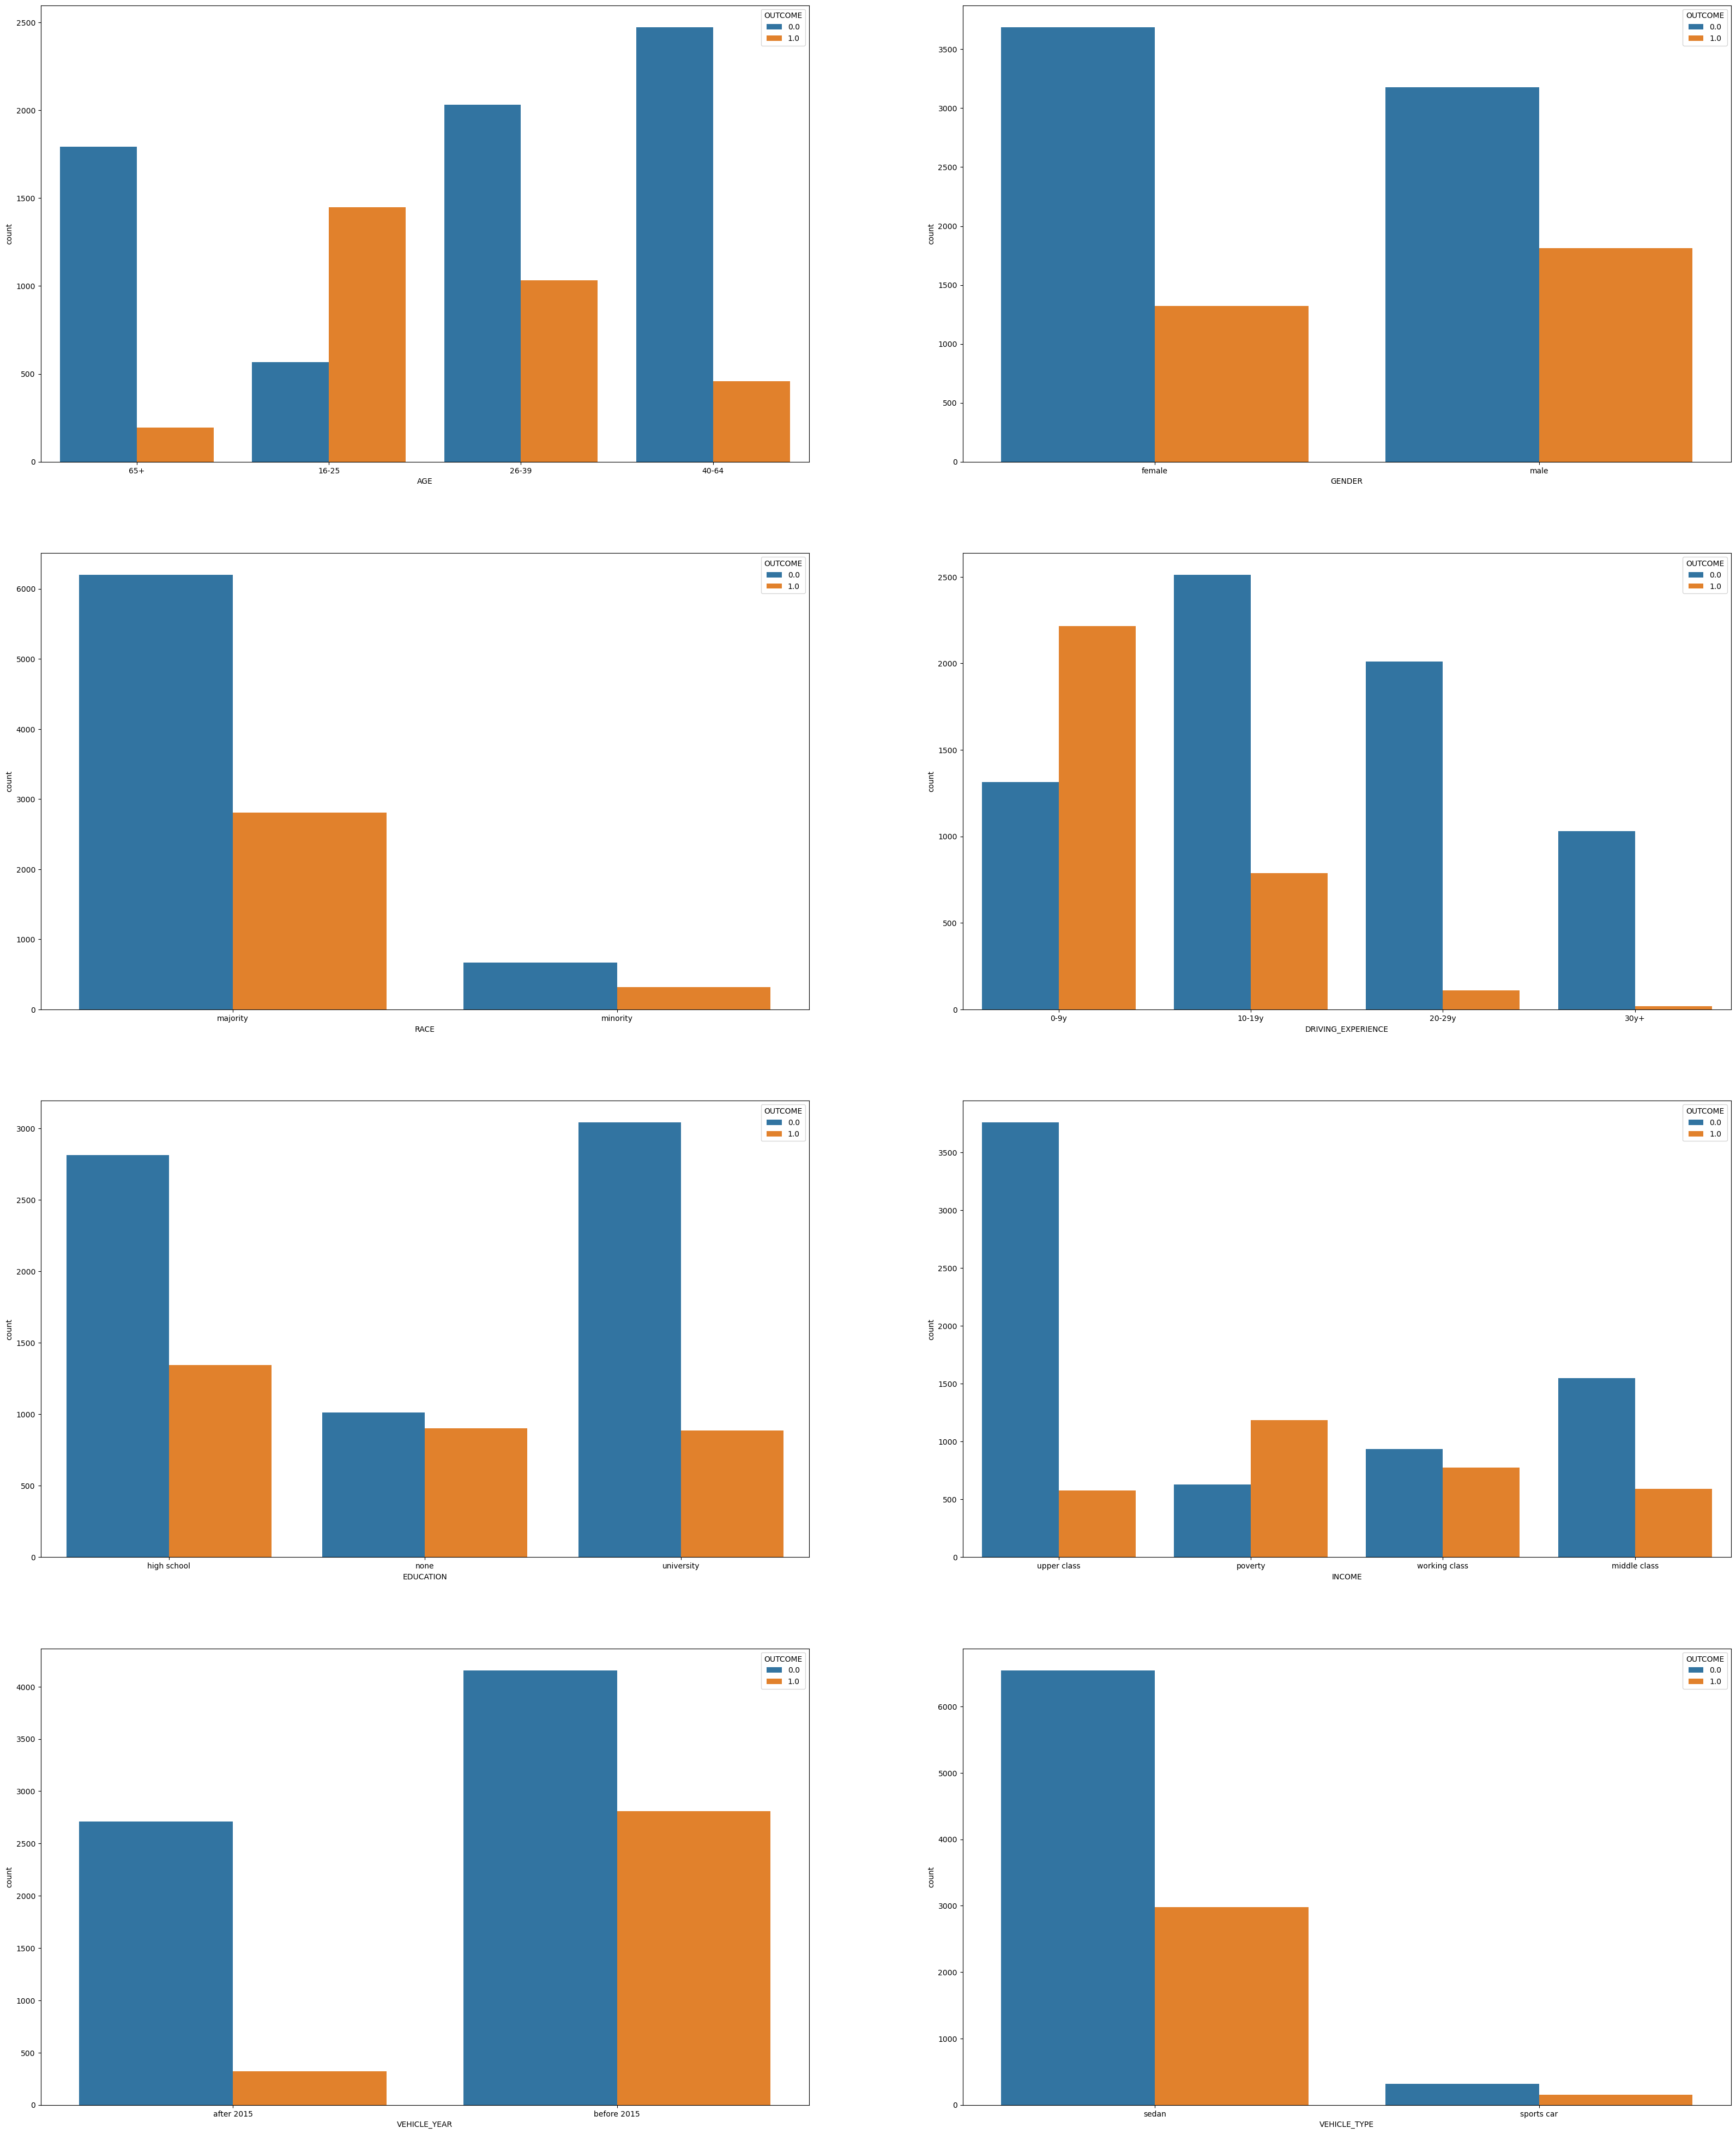

In [16]:
fig, ax = plt.subplots(4, 2, figsize = (40, 50))

for col, ax in zip(df.select_dtypes("object").columns, ax.flat[:]):
    sns.countplot(data = df, x = col, ax = ax, hue = "OUTCOME")

In [17]:
# we dropped this feature beacues it is not useful for us
df.drop(["POSTAL_CODE"], axis = 1, inplace = True)


In [18]:
df.columns
df.shape

(10000, 17)

In [19]:
df.isnull().sum().sort_values(ascending = False)

CREDIT_SCORE           982
ANNUAL_MILEAGE         957
AGE                      0
MARRIED                  0
PAST_ACCIDENTS           0
DUIS                     0
SPEEDING_VIOLATIONS      0
VEHICLE_TYPE             0
CHILDREN                 0
VEHICLE_YEAR             0
GENDER                   0
VEHICLE_OWNERSHIP        0
INCOME                   0
EDUCATION                0
DRIVING_EXPERIENCE       0
RACE                     0
OUTCOME                  0
dtype: int64

CREDIT_SCORE           9.82
ANNUAL_MILEAGE         9.57
AGE                    0.00
MARRIED                0.00
PAST_ACCIDENTS         0.00
DUIS                   0.00
SPEEDING_VIOLATIONS    0.00
VEHICLE_TYPE           0.00
CHILDREN               0.00
VEHICLE_YEAR           0.00
GENDER                 0.00
VEHICLE_OWNERSHIP      0.00
INCOME                 0.00
EDUCATION              0.00
DRIVING_EXPERIENCE     0.00
RACE                   0.00
OUTCOME                0.00
dtype: float64
----------------------------------------------------------------


<AxesSubplot:>

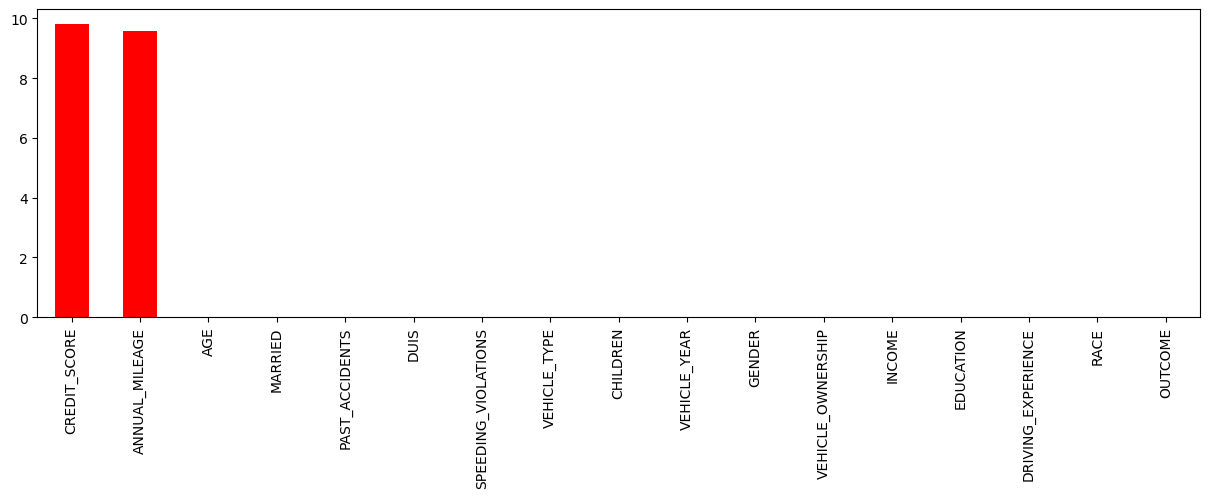

In [20]:
# as we can see we have only two features with null values 
# check the percentage of null values in each feature
# ----------------------------------------------------------------
missingPercentages = df.isna().sum().sort_values(ascending = False)/len(df)*100
print(missingPercentages)
print('----------------------------------------------------------------')
# ----------------------------------------------------------------
# let's check the percentage of missing values visualization.
missingPercentages.plot(kind="bar", figsize=(15, 4),color = 'red')

In [21]:
# since we have a small percentage of missing values in the features we refill only 
# the missing values with the mean of the feature
df["CREDIT_SCORE"] = df["CREDIT_SCORE"].fillna(np.mean(df["CREDIT_SCORE"]))


In [22]:
df["ANNUAL_MILEAGE"] = df["ANNUAL_MILEAGE"].fillna(int(np.mean(df["ANNUAL_MILEAGE"])))

In [23]:
df.isna().sum()


AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

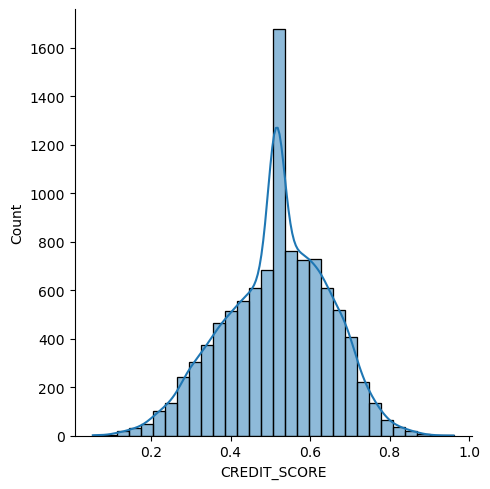

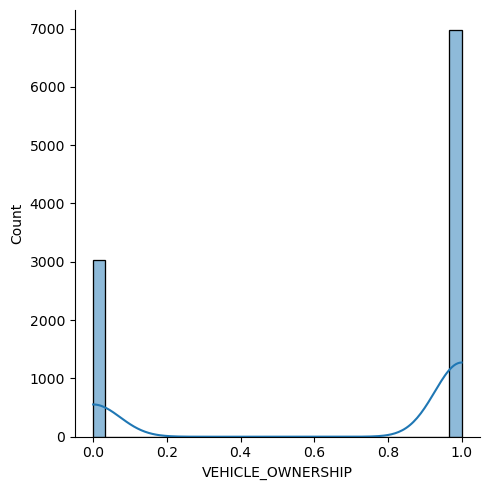

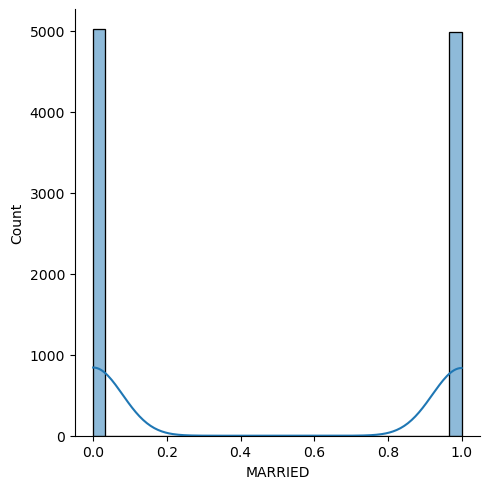

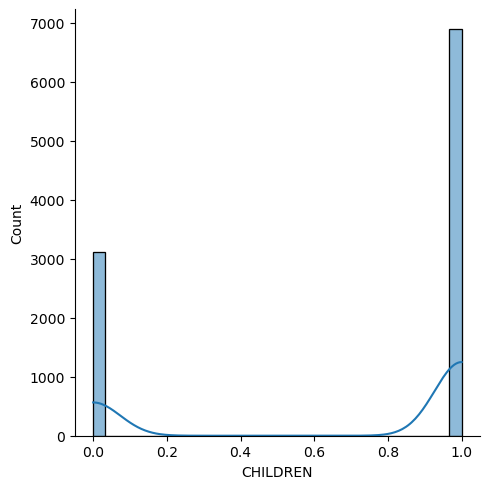

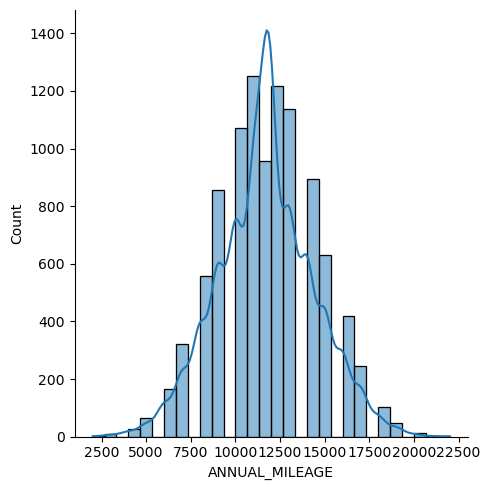

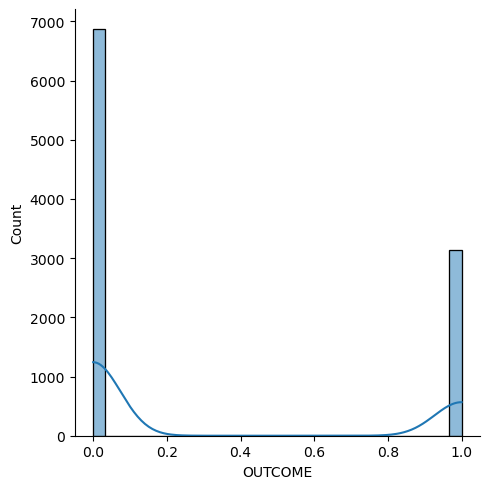

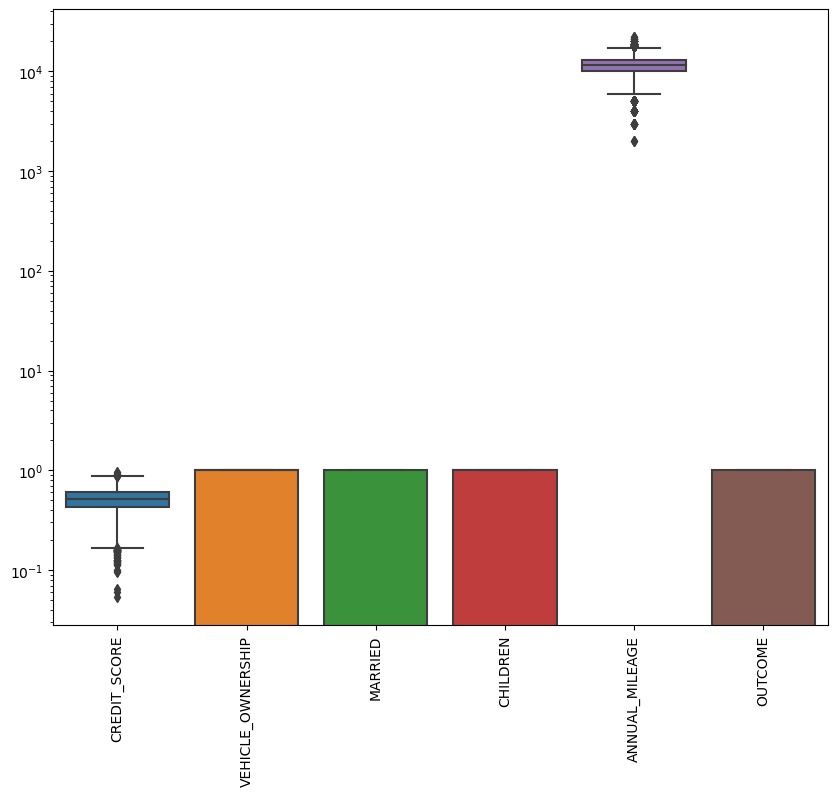

In [24]:
for i in df.select_dtypes(include='float64').columns:
    sns.displot(df[i], kde=True, bins=30)

newDF = df.select_dtypes(include='float64')

plt.figure(figsize=(10, 8))
sns.boxplot(data=newDF)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

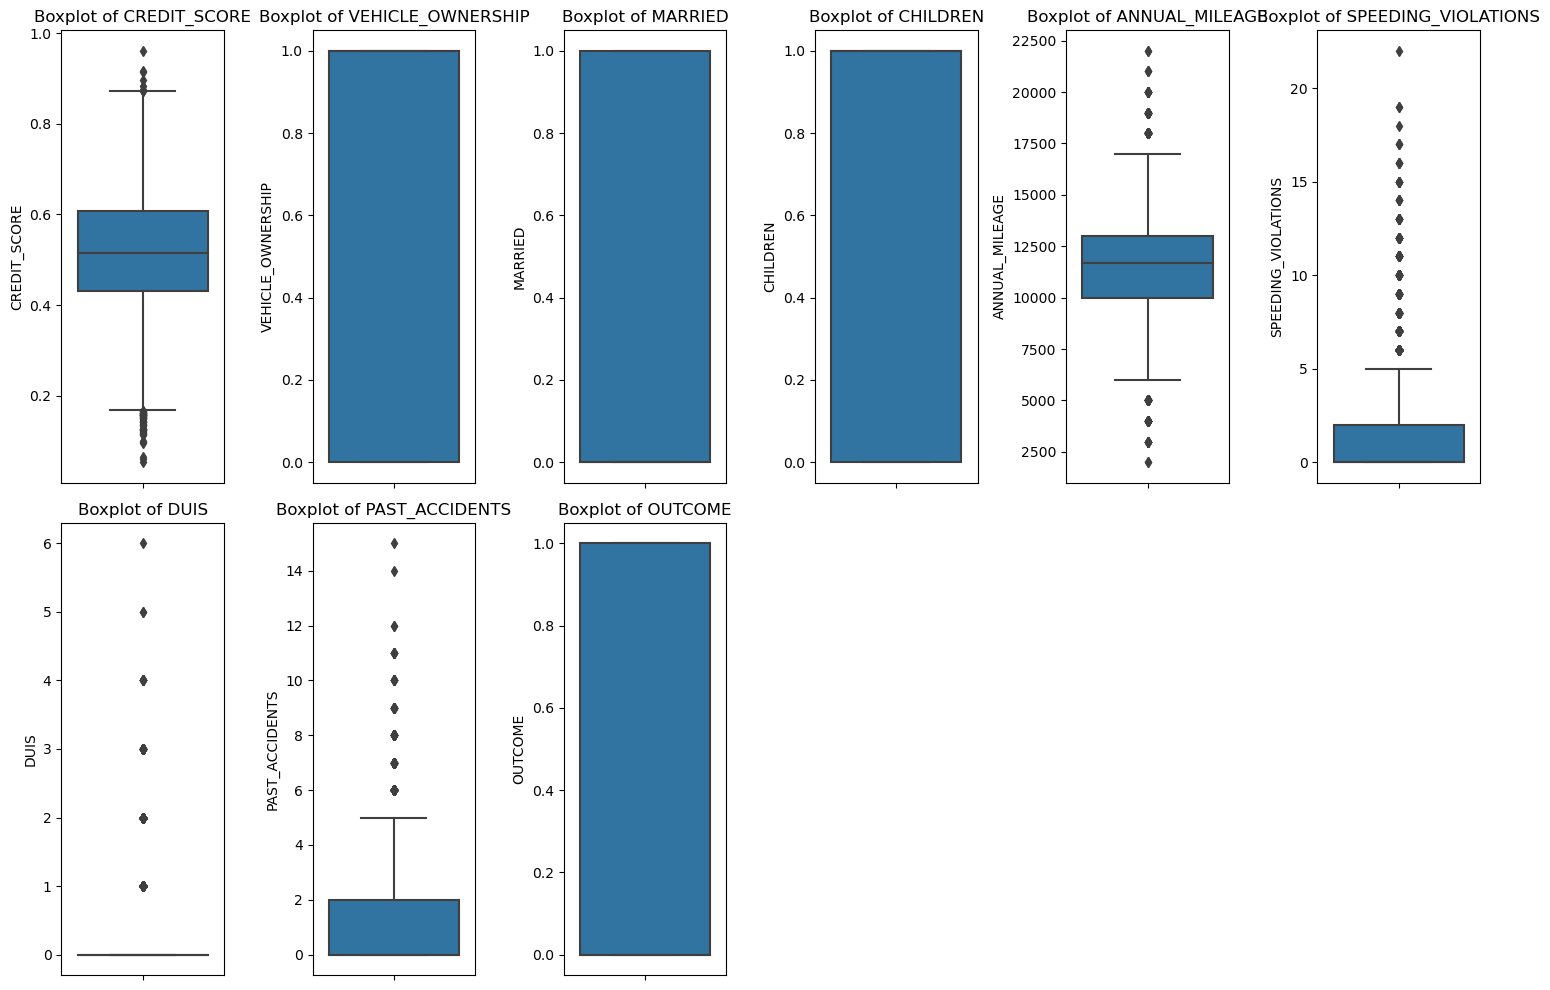

In [25]:
numeric_cols = df.select_dtypes(include=np.number).columns
n_cols = 6  # Number of columns in the grid
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate required rows

plt.figure(figsize=(15, 5 * n_rows))  # Adjust height based on rows

for i, col in enumerate(numeric_cols, 1):  # Start index at 1 for subplot numbering
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Prevent overlapping titles
plt.show()

In [26]:
df.shape

(10000, 17)

## Z-Score Method to detict the Outliers 
### first we calulate the upper and the lower limits 

In [27]:

upper_limit = df["CREDIT_SCORE"].mean() + 3*df["CREDIT_SCORE"].std()
lower_limit = df["CREDIT_SCORE"].mean() - 3*df["CREDIT_SCORE"].std()
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

# find the outliers in the feature
# df.loc[(df['CREDIT_SCORE'] > upper_limit) | (df['CREDIT_SCORE'] < lower_limit)]
newDF = df.loc[(df['CREDIT_SCORE'] < upper_limit) & (df['CREDIT_SCORE'] > lower_limit)]
print("The old dataset is "+ str(df.shape[0]) + " rows.")
print("The new dataset contains " + str(newDF.shape[0]) + " rows.")



Upper limit:  0.9080695171658699
Lower limit:  0.12355610203970485
The old dataset is 10000 rows.
The new dataset contains 9985 rows.


In [28]:

upper_limit = newDF["ANNUAL_MILEAGE"].mean() + 3*newDF["ANNUAL_MILEAGE"].std()
lower_limit = newDF["ANNUAL_MILEAGE"].mean() - 3*newDF["ANNUAL_MILEAGE"].std()
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

# find the outliers in the feature
# df.loc[(df['CREDIT_SCORE'] > upper_limit) | (df['CREDIT_SCORE'] < lower_limit)]
newDF = newDF.loc[(newDF['ANNUAL_MILEAGE'] < upper_limit) & (newDF['ANNUAL_MILEAGE'] > lower_limit)]
print("The new dataset contains " + str(newDF.shape[0]) + " rows.")

Upper limit:  19733.667310279216
Lower limit:  3657.2855189646507
The new dataset contains 9955 rows.


In [29]:
upper_limit = newDF["SPEEDING_VIOLATIONS"].mean() + 3*newDF["SPEEDING_VIOLATIONS"].std()
lower_limit = newDF["SPEEDING_VIOLATIONS"].mean() - 3*newDF["SPEEDING_VIOLATIONS"].std()
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

# find the outliers in the feature
# df.loc[(df['CREDIT_SCORE'] > upper_limit) | (df['CREDIT_SCORE'] < lower_limit)]
newDF = newDF.loc[(newDF['SPEEDING_VIOLATIONS'] < upper_limit) & (newDF['SPEEDING_VIOLATIONS'] > lower_limit)]
print("The new dataset contains " + str(newDF.shape[0]) + " rows.")

Upper limit:  8.189909426093763
Lower limit:  -5.225368994150017
The new dataset contains 9773 rows.


In [30]:
newDF.shape

(9773, 17)

In [31]:
df.shape

(10000, 17)

In [32]:
df = newDF.copy()
df.shape

(9773, 17)

70
0


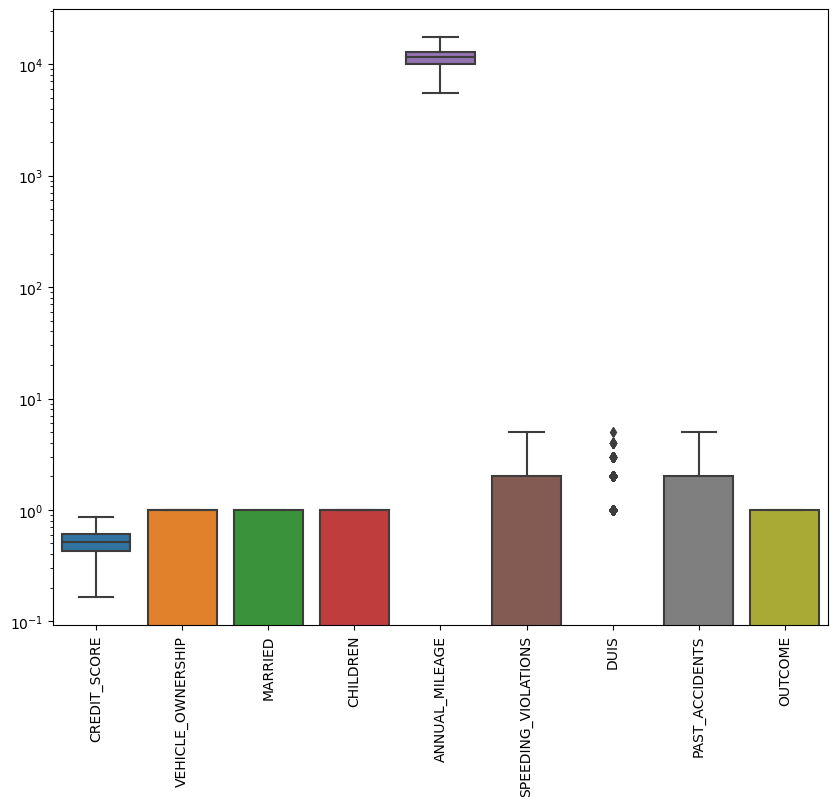

In [33]:
    # drop the outliers 
    numeric_df = df.select_dtypes(include=np.number).drop(columns=["DUIS"])

    # Calculate quartiles and IQR for each numeric column
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_df = pd.DataFrame(columns=numeric_df.columns)

    for col in numeric_df.columns:
        lower_outliers = numeric_df[col] < lower_bound[col]
        upper_outliers = numeric_df[col] > upper_bound[col]
        feature_outliers = numeric_df[(lower_outliers) | (upper_outliers)]
        outliers_df = pd.concat([outliers_df, feature_outliers])


    print(outliers_df.duplicated().sum())
    # Drop duplicates to get unique outlier samples
    outliers_df = outliers_df.drop_duplicates()
    print(outliers_df.duplicated().sum())

    dfNoOutliers = df.copy()
    # cappint outliers
    for col in numeric_df.columns:
        lower_bound = Q1[col] - 1.5 * IQR[col]
        upper_bound = Q3[col] + 1.5 * IQR[col]
        dfNoOutliers[col] = np.clip(dfNoOutliers[col], lower_bound, upper_bound)

    plt.figure(figsize=(10, 8))
    sns.boxplot(data=dfNoOutliers)
    plt.yscale('log')
    plt.xticks(rotation=90)
    plt.show()

Text(0.5, 0, 'Column Number')

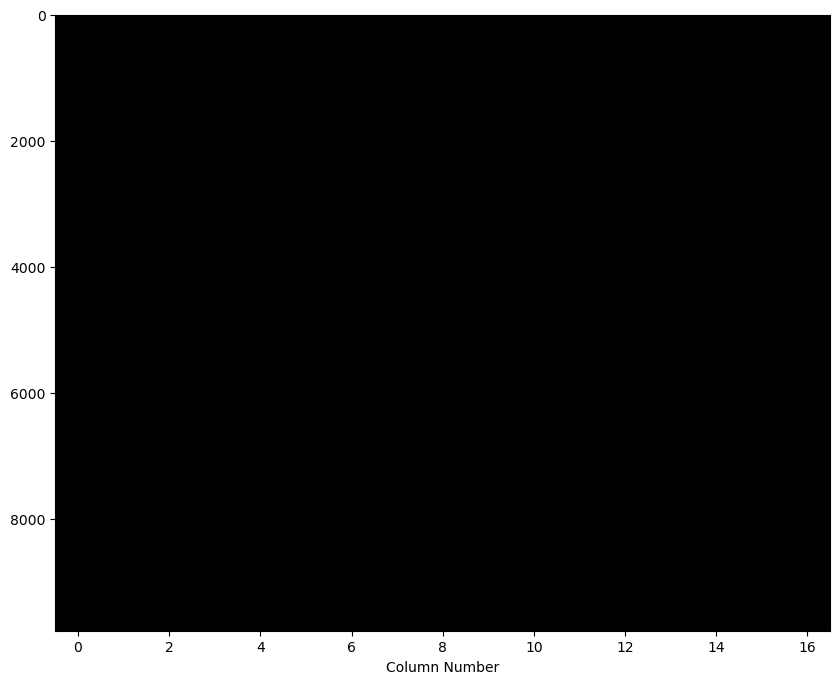

In [34]:
plt.figure(figsize=(10, 8))
plt.imshow(dfNoOutliers.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")

In [35]:
# ----------------------------------------------------------------
# let's check number of missing values in each column (feature).
# ----------------------------------------------------------------
sumofMissinfValuesCol = dfNoOutliers.isna().sum().sort_values(ascending=False)
print("number of columns missing values is ",end=': ')
print(sumofMissinfValuesCol[sumofMissinfValuesCol != 0].count())
print(sumofMissinfValuesCol[sumofMissinfValuesCol != 0])

number of columns missing values is : 0
Series([], dtype: int64)


<AxesSubplot:>

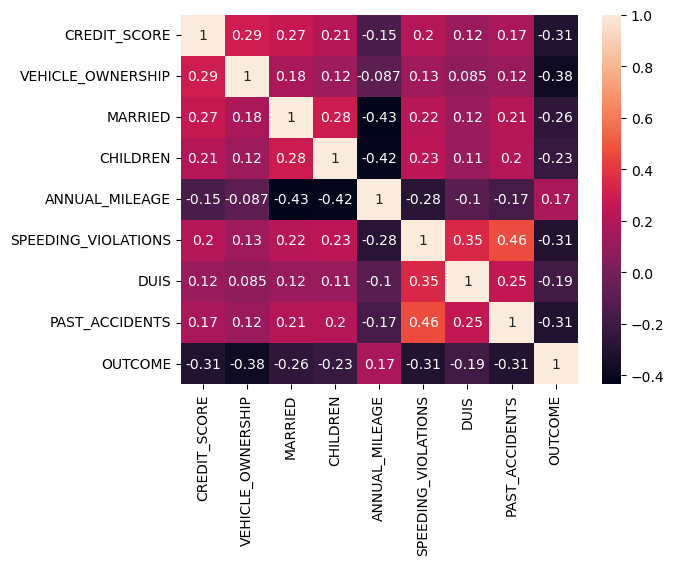

In [36]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)


## Label Encoding 
### since we have 8 features which are catagorical we should make encoding to make sure that the ML algorithm will work correctly
#### (Nominal : GANDER)
#### (Ordinal : VEHCILE_TYPE , VEHCLE_YEAR , AGE , RACE , DRIVING_EXPERINCE , EDUCATION , INCOME)
The encoding will contain : 


In [37]:
from sklearn.preprocessing import LabelEncoder


In [38]:
nomialEncoder = LabelEncoder()

df["GENDER"] = nomialEncoder.fit_transform(df["GENDER"])
df['GENDER'].unique()

array([0, 1])

In [39]:
df["VEHICLE_TYPE"].unique()

array(['sedan', 'sports car'], dtype=object)

In [40]:
vehicle_mapping = {"sedan": 0, "sports car": 1}
df["VEHICLE_TYPE"] = df["VEHICLE_TYPE"].map(vehicle_mapping)
df["VEHICLE_TYPE"].unique()

array([0, 1], dtype=int64)

In [41]:
df["VEHICLE_YEAR"].unique()

array(['after 2015', 'before 2015'], dtype=object)

In [42]:
vehicle_year_mapping = {"after 2015": 0, "before 2015": 1}
df["VEHICLE_YEAR"] = df["VEHICLE_YEAR"].map(vehicle_year_mapping)
df["VEHICLE_YEAR"].unique()

array([0, 1], dtype=int64)

In [43]:
df["AGE"].unique()

array(['65+', '16-25', '26-39', '40-64'], dtype=object)

In [44]:
age_mapping = {"65+": 0, "16-25": 1, "26-39": 2, "40-64": 3}
df["AGE"] = df["AGE"].map(age_mapping)
df["AGE"].unique()

array([0, 1, 2, 3], dtype=int64)

In [45]:
df["RACE"].unique()

array(['majority', 'minority'], dtype=object)

In [46]:
race_mapping = {"majority": 0, "minority": 1}
df["RACE"] = df["RACE"].map(race_mapping)
df["RACE"].unique()

array([0, 1], dtype=int64)

In [47]:
df["DRIVING_EXPERIENCE"].unique()

array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

In [48]:
driving_experience_mapping = {"0-9y": 0, "10-19y": 1, "20-29y": 2, "30y+": 3}
df["DRIVING_EXPERIENCE"] = df["DRIVING_EXPERIENCE"].map(driving_experience_mapping)
df["DRIVING_EXPERIENCE"].unique()

array([0, 1, 2, 3], dtype=int64)

In [49]:
df["EDUCATION"].unique()

array(['high school', 'none', 'university'], dtype=object)

In [50]:
education_mapping = {"high school": 1, "none": 0,"university" : 2}
df["EDUCATION"] = df["EDUCATION"].map(education_mapping)
df["EDUCATION"].unique()

array([1, 0, 2], dtype=int64)

In [51]:
df["INCOME"].unique()

array(['upper class', 'poverty', 'working class', 'middle class'],
      dtype=object)

In [52]:
income_mapping = {'upper class' : 0, 'poverty' : 1 , 'working class' : 2 , 'middle class' : 3}
df["INCOME"] = df["INCOME"].map(income_mapping)
df["INCOME"].unique()

array([0, 1, 2, 3], dtype=int64)

In [53]:
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,0,0,0,1,0,0.629027,1.0,0,0.0,1.0,12000.0,0,0,0,0,0.0
1,1,1,0,0,0,1,0.357757,0.0,1,0.0,0.0,16000.0,0,0,0,0,1.0
2,1,0,0,0,1,2,0.493146,1.0,1,0.0,0.0,11000.0,0,0,0,0,0.0
3,1,1,0,0,2,2,0.206013,1.0,1,0.0,1.0,11000.0,0,0,0,0,0.0
4,2,1,0,1,0,2,0.388366,1.0,1,0.0,0.0,12000.0,0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,1,2,0,0.582787,1.0,1,0.0,0.0,16000.0,0,0,0,1,0.0
9996,2,0,0,1,0,3,0.522231,1.0,0,0.0,1.0,11697.0,0,1,0,0,0.0
9997,2,1,0,0,1,3,0.470940,1.0,1,0.0,1.0,14000.0,0,0,0,0,0.0
9998,2,0,0,1,1,1,0.364185,0.0,1,0.0,1.0,13000.0,0,2,0,1,1.0


## Machine Learning Model 
### 30 % test 70 % training

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [55]:
X = df.drop(columns=["OUTCOME"])
y = df["OUTCOME"]   
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [56]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [57]:
x_train

array([[ 0.27073859, -0.9787379 , -0.33411781, ..., -0.15880558,
        -0.426409  , -0.62600197],
       [-0.65347432, -0.9787379 , -0.33411781, ..., -0.716214  ,
        -0.426409  , -0.62600197],
       [ 0.27073859, -0.9787379 , -0.33411781, ..., -0.716214  ,
        -0.426409  , -0.62600197],
       ...,
       [-0.65347432,  1.021724  , -0.33411781, ..., -0.716214  ,
        -0.426409  , -0.62600197],
       [ 1.1949515 , -0.9787379 , -0.33411781, ..., -0.716214  ,
        -0.426409  , -0.62600197],
       [ 0.27073859, -0.9787379 , -0.33411781, ..., -0.716214  ,
        -0.426409  , -0.62600197]])

In [63]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

models = {
    "Logistic": LogisticRegression(),
    "xTree": ExtraTreesClassifier(),
    "rfClassifier": RandomForestClassifier(),
    "tree": DecisionTreeClassifier(max_depth = 5, criterion = "gini"),
    "knClassifier": KNeighborsClassifier(n_neighbors = 5),
    "gBoost": GradientBoostingClassifier(),
    "Ada Boost": AdaBoostClassifier(n_estimators = 150),
    "Bagging": BaggingClassifier(n_estimators = 150),
    "xgBoost": XGBClassifier(),
    "svm": SVC(),
}

accuracy_scores = []
predicted = []

for i in models:
    models[i].fit(x_train, y_train)
    y_pred = models[i].predict(x_test)
    accuracy_scores.append(int(accuracy_score(y_pred, y_test) * 100))
    predicted.append(y_pred)

for j, k in zip(accuracy_scores, models):
    print (' \n ', k, ' accuracy : ', j, ' %  ')

 
  Logistic  accuracy :  83  %  
 
  xTree  accuracy :  81  %  
 
  rfClassifier  accuracy :  82  %  
 
  tree  accuracy :  83  %  
 
  knClassifier  accuracy :  80  %  
 
  gBoost  accuracy :  83  %  
 
  Ada Boost  accuracy :  83  %  
 
  Bagging  accuracy :  81  %  
 
  xgBoost  accuracy :  63  %  
 
  svm  accuracy :  82  %  


Logistic  :  83  %


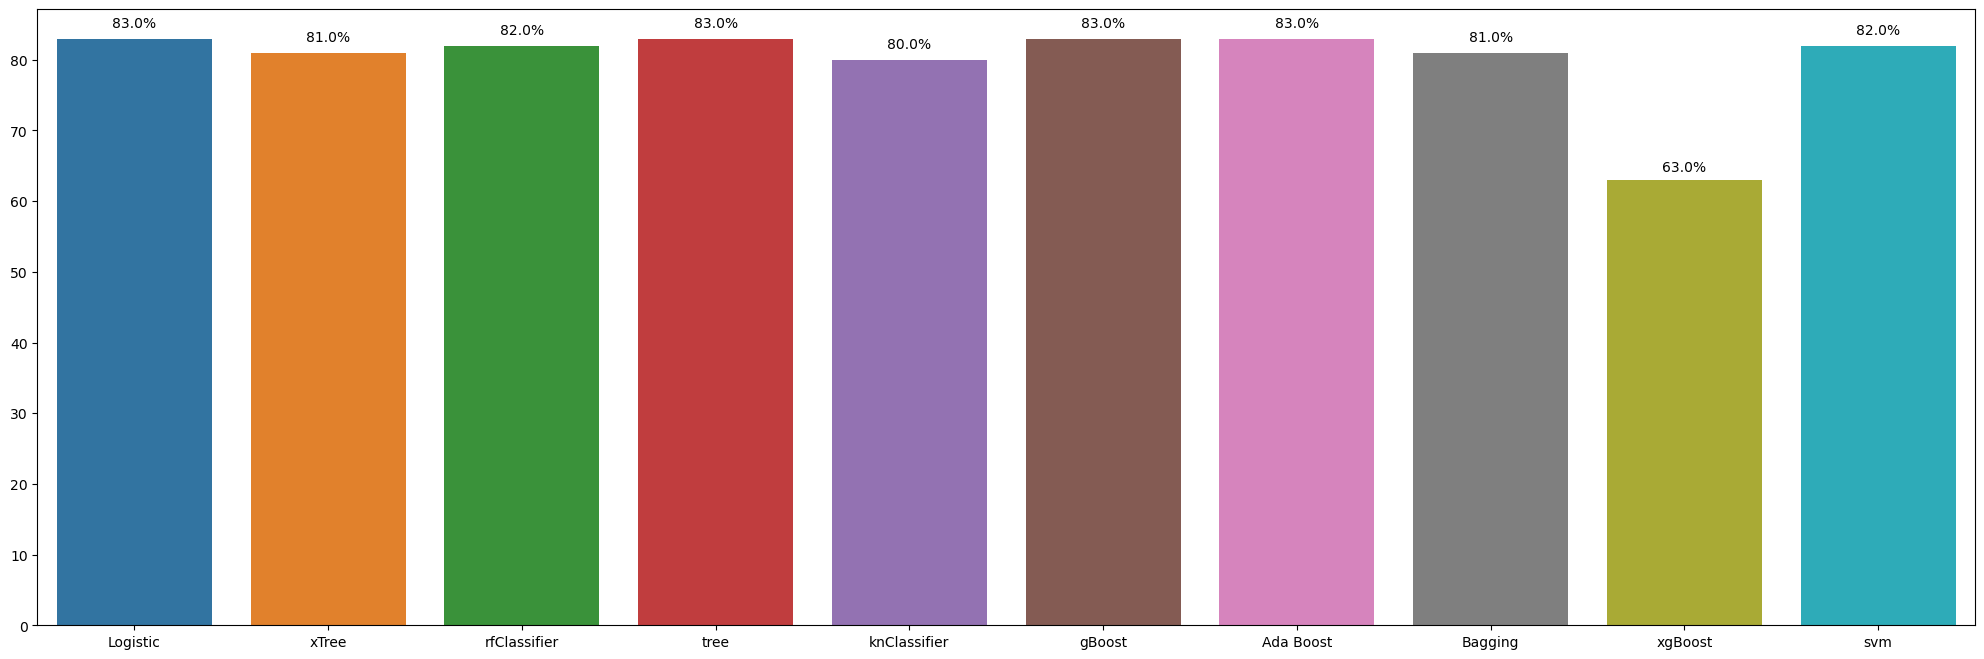

In [74]:
plt.figure(figsize = (25, 8))
ax = sns.barplot(x = list(models.keys()), y = accuracy_scores)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')

print (list(models.keys())[accuracy_scores.index(max(accuracy_scores))], " : " ,max(accuracy_scores), " %")

In [66]:
cc = RandomForestClassifier()

cc.fit(x_train, y_train)

# cc.predict(x_test)
importances = cc.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

In [67]:
cc.feature_importances_

array([0.04504725, 0.03192362, 0.01397838, 0.14926431, 0.03649841,
       0.05917211, 0.19722931, 0.08624292, 0.06559851, 0.02475263,
       0.02166078, 0.11151115, 0.01035976, 0.06888629, 0.01407128,
       0.06380328])

In [68]:
importances[np.argsort(importances)[::-1]]

array([0.19722931, 0.14926431, 0.11151115, 0.08624292, 0.06888629,
       0.06559851, 0.06380328, 0.05917211, 0.04504725, 0.03649841,
       0.03192362, 0.02475263, 0.02166078, 0.01407128, 0.01397838,
       0.01035976])

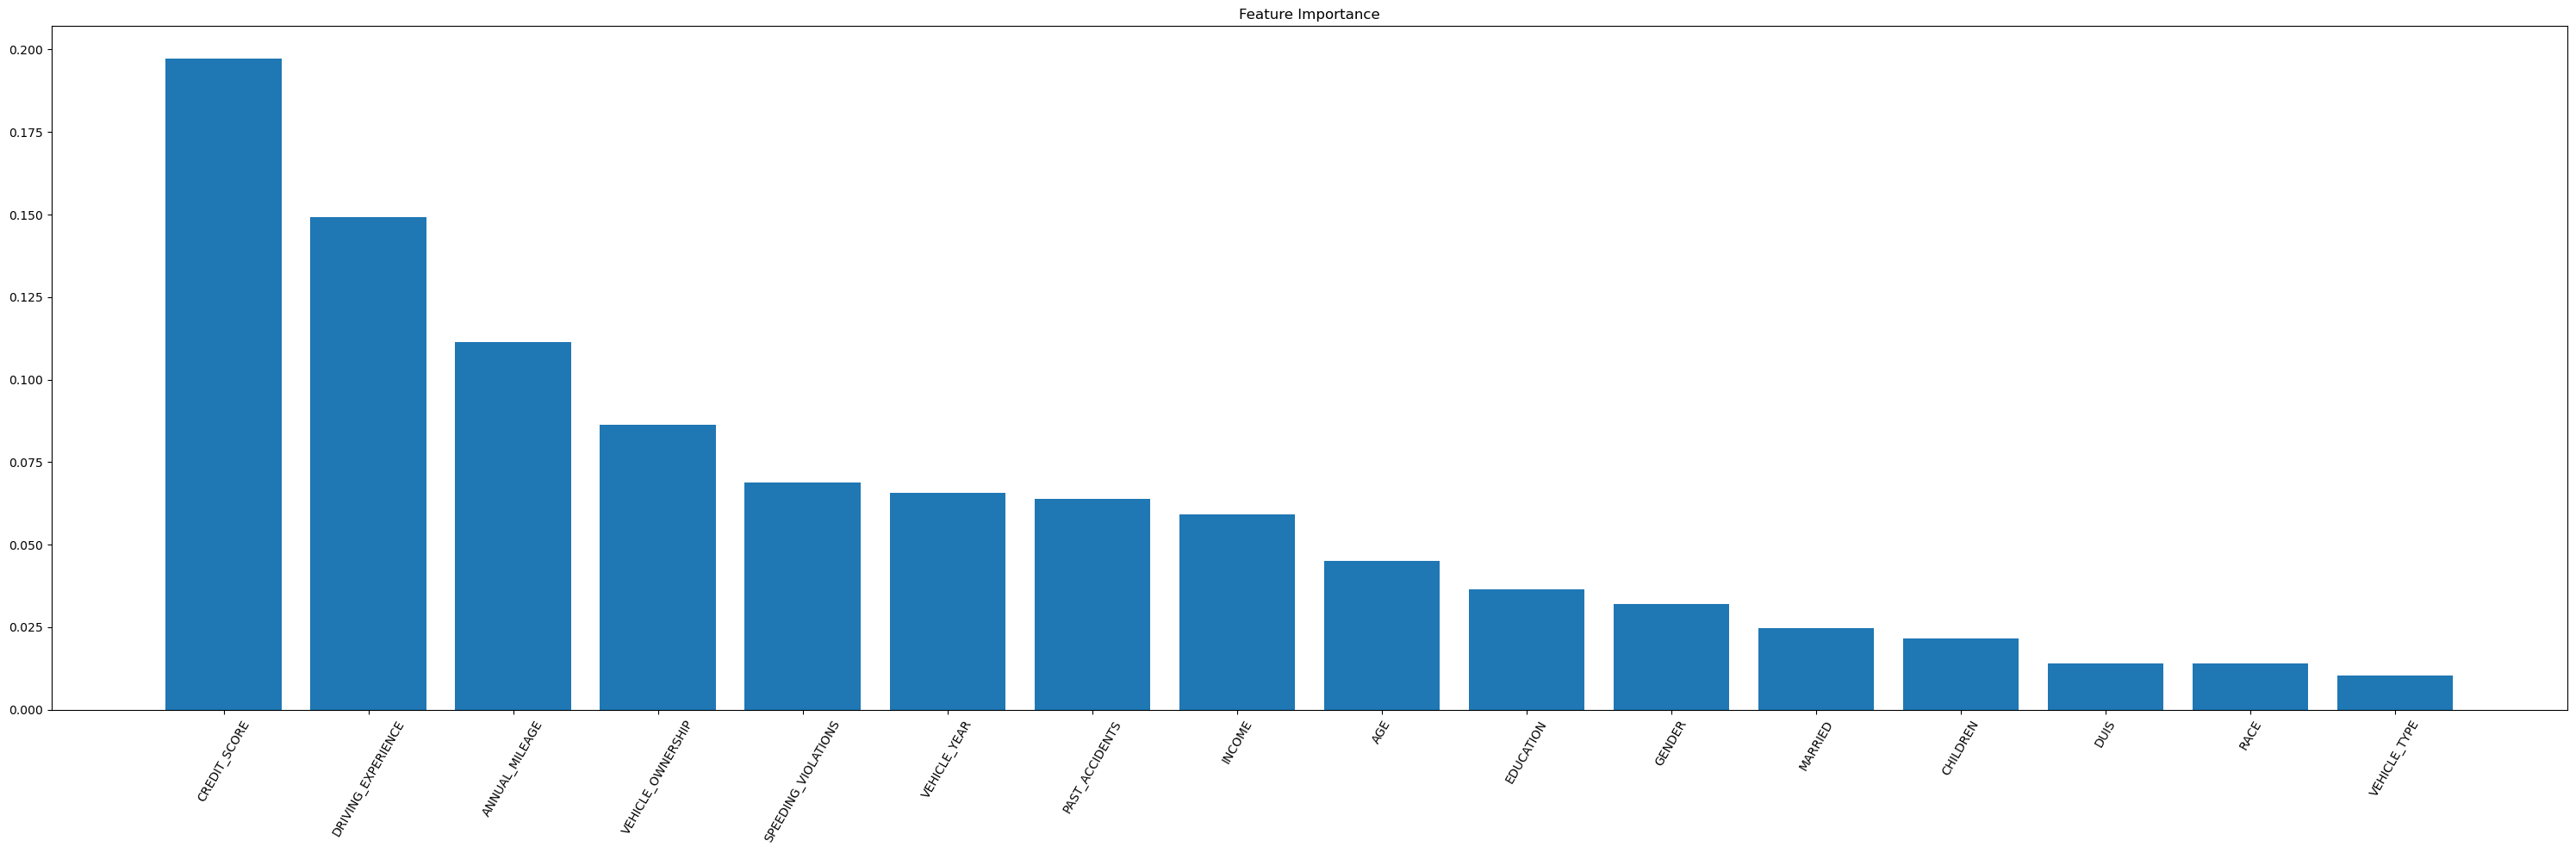

In [69]:
import matplotlib.pyplot as plt
 
x_train = pd.DataFrame(x_train, columns = X.columns)

plt.subplots(figsize = (30,10))
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation = 60)
plt.tight_layout()
plt.show()

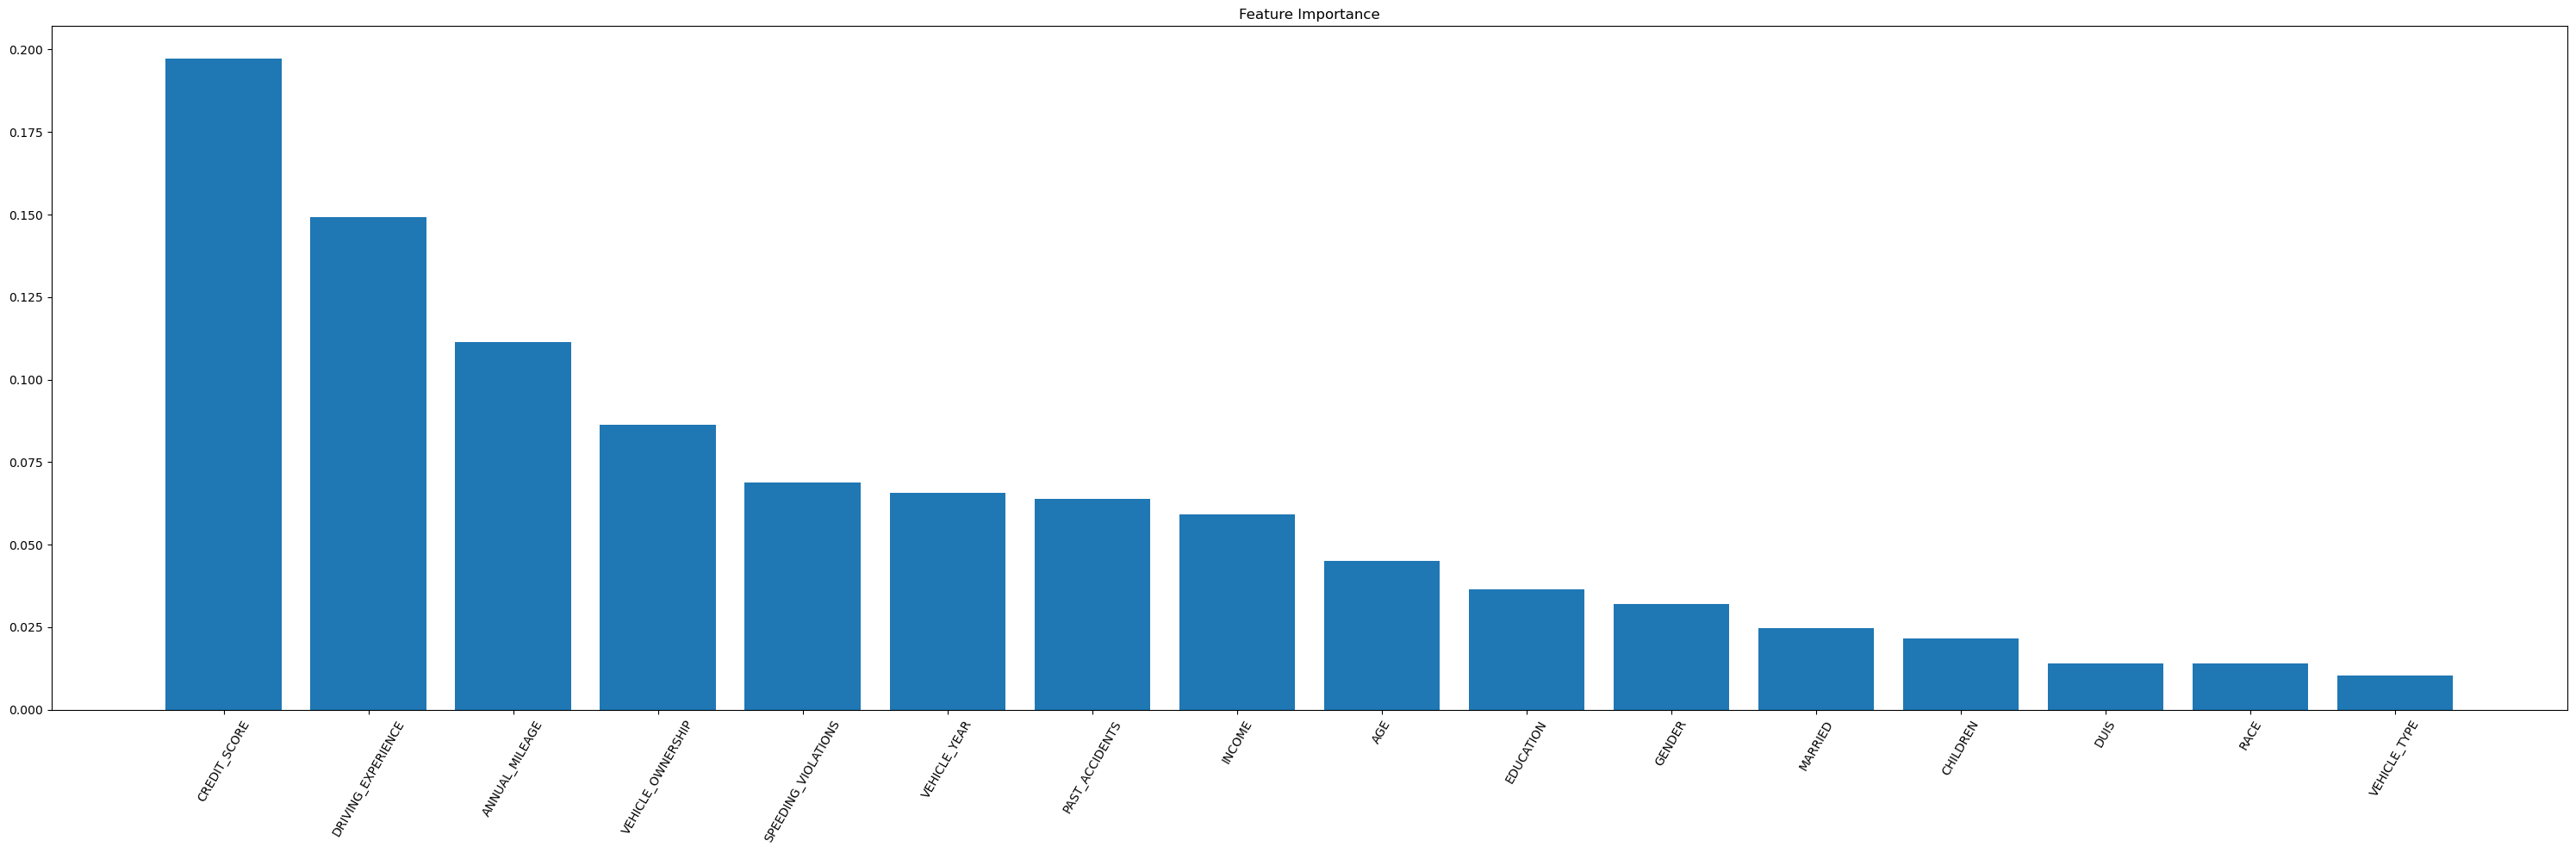

In [70]:
import matplotlib.pyplot as plt
 
plt.subplots(figsize = (30,10))
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation = 60)
plt.tight_layout()
plt.show()

In [71]:
from sklearn.metrics import classification_report

for i, j in zip(list(models.keys()), predicted):
    print (' \n \n ', i, ' : \n \n', classification_report(j, y_test))

 
 
  Logistic  : 
 
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      2033
         1.0       0.74      0.73      0.73       899

    accuracy                           0.84      2932
   macro avg       0.81      0.81      0.81      2932
weighted avg       0.84      0.84      0.84      2932

 
 
  xTree  : 
 
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      2099
         1.0       0.67      0.72      0.69       833

    accuracy                           0.82      2932
   macro avg       0.78      0.79      0.78      2932
weighted avg       0.82      0.82      0.82      2932

 
 
  rfClassifier  : 
 
               precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      2098
         1.0       0.68      0.72      0.70       834

    accuracy                           0.82      2932
   macro avg       0.78      0.79      0.79      2932
weighte

In [72]:
x_train

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,0.270739,-0.978738,-0.334118,-0.027184,-1.629381,-0.146599,-1.505145,-1.500475,0.662798,-0.981605,0.682743,-1.038862,-0.225130,-0.158806,-0.426409,-0.626002
1,-0.653474,-0.978738,-0.334118,-1.060315,1.090628,-0.984430,0.765038,0.666456,0.662798,-0.981605,0.682743,-0.278286,4.441881,-0.716214,-0.426409,-0.626002
2,0.270739,-0.978738,-0.334118,-1.060315,1.090628,-0.984430,1.329425,0.666456,0.662798,1.018740,0.682743,-1.038862,-0.225130,-0.716214,-0.426409,-0.626002
3,-1.577687,1.021724,-0.334118,2.039080,-0.269377,1.529063,-0.713777,0.666456,0.662798,-0.981605,0.682743,-0.278286,-0.225130,1.513420,-0.426409,3.088204
4,-0.653474,-0.978738,-0.334118,-1.060315,-0.269377,-0.146599,-1.190694,0.666456,0.662798,-0.981605,-1.464680,1.242867,-0.225130,-0.716214,-0.426409,-0.626002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,0.270739,-0.978738,-0.334118,-1.060315,-1.629381,1.529063,-0.530842,0.666456,0.662798,1.018740,0.682743,-0.278286,-0.225130,-0.716214,-0.426409,-0.626002
6837,1.194951,1.021724,-0.334118,1.005948,-0.269377,1.529063,-0.682392,-1.500475,0.662798,1.018740,0.682743,-0.658574,-0.225130,1.513420,-0.426409,-0.006968
6838,-0.653474,1.021724,-0.334118,-1.060315,-0.269377,-0.146599,0.090791,-1.500475,0.662798,-0.981605,-1.464680,0.862579,-0.225130,-0.716214,-0.426409,-0.626002
6839,1.194951,-0.978738,-0.334118,-1.060315,1.090628,-0.984430,1.600317,-1.500475,0.662798,1.018740,0.682743,-0.013225,-0.225130,-0.716214,-0.426409,-0.626002
